In [1]:
# This file is part of pydidas.
#
# Copyright 2023 - 2024, Helmholtz-Zentrum Hereon
# SPDX-License-Identifier: GPL-3.0-only
#
# pydidas is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License version 3 as
# published by the Free Software Foundation.
#
# Pydidas is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Pydidas. If not, see <http://www.gnu.org/licenses/>.

"""
The dataset module includes the Dataset subclasses of numpy.ndarray with additional
embedded metadata.
"""

__author__ = "Gudrun Lotze"
__copyright__ = "Copyright 2024, Helmholtz-Zentrum Hereon"
__license__ = "GPL-3.0-only"
__maintainer__ = "Gudrun Lotze"
__status__ = "Development"

In [2]:
from pathlib import Path
import os
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from pydidas.core import Dataset
from pydidas.data_io import import_data
%matplotlib inline


import sys

from pydidas.version import version
print('Pydidas version: ', version)

from dataclasses import dataclass

from scipy.optimize import curve_fit



fname = '../../Bucket/stress_strain.py'
module_dir = os.path.dirname(fname)
# Add the directory to sys.path
if module_dir not in sys.path:
    sys.path.append(module_dir)

from stress_strain import extract_d_spacing, chi_pos_verification, extract_d_spacing, ds_slicing, combine_sort_d_spacing_pos_neg, group_d_spacing_by_chi, extract_units, get_param_unit_at_index, idx_s2c_grouping, pre_regression_calculation



Pydidas version:  24.09.19


Auxiliary functions for plotting and main function

  fig.show()

  s2c_mean_pos = np.nanmean(s2c_pos_slope_matrix, axis=1)

  d_spacing_mean_pos = np.nanmean(d_spacing_pos_slope_matrix, axis=1)

  s2c_mean_neg = np.nanmean(s2c_neg_slope_matrix, axis=1)

  d_spacing_mean_neg = np.nanmean(d_spacing_neg_slope_matrix, axis=1)



🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿
Dataset(
axis_labels: {
    0: 'y'
    1: 'x'
    2: 'chi'
    3: '0: position; 1: area; 2: FWHM; 3: background at peak; 4: total count
       intensity'},
axis_ranges: {
    0: array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
              6.5, 7. , 7.5, 8. , 8.5])
    1: array([ 0. ,  0.5, ...,  9.5, 10. ])
    2: array([-174.987382, -164.987736, ...,  165.000559,  175.000204])
    3: array([0, 1, 2, 3, 4])},
axis_units: {
    0: 'um'
    1: 'um'
    2: 'deg'
    3: ''},
metadata: {'indices': '[:]', 'dataset': 'entry/data/data'},
data_unit: ,
data_label: position / nm; area / (cts * nm); FWHM / nm; background at peak / cts; total count intensity / cts,
array([[[[2.096060e-01, 3.675149e-01, ..., 3.554197e+00, 4.950977e+03],
         [2.096706e-01, 3.004557e-01, ..., 3.382196e+00, 4.047588e+03],
         ...,
         [2.095264e-01, 1.937868e-01, ..., 2.612349e+00, 2.610598e+03],
         [2.095157e-01, 2.794639e-01, ..., 

  fig.show()

  fig.show()



d_spacing_combined
 Dataset(
axis_labels: {
    0: '0: d-, 1: d+'
    1: 'sin^2(chi)'},
axis_ranges: {
    0: array([0, 1])
    1: array([0.007605, 0.067011, 0.178637, 0.328864, 0.328969, 0.329075,
              0.329179, 0.49986 , 0.499972, 0.500084, 0.500195, 0.670873,
              0.670978, 0.671083, 0.671188, 0.821406, 0.933017, 0.992404])},
axis_units: {
    0: ''
    1: ''},
metadata: {},
data_unit: nm,
data_label: 0: position_neg, 1: position_pos,
array([[0.212627, 0.212561, ..., 0.210747, 0.210507],
       [0.212644, 0.212444, ..., 0.210475, 0.21037 ]])
)
🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓🍓
d_spacing shape (36,)
d_spacing_pos shape (18,)
d_spacing_neg shape (18,)
d_spacing_combined shape (2, 18)
d_spacing_avg shape (18,)
d_spacing_diff shape (18,)
👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠
d_spacing_combined shape (2, 18)
d_spacing_combined
 Dataset(
axis_labels: {
    0: '0: d-, 1: d+'
    1: 'sin^2(chi)'},
axis_ranges: {
    0: array([0, 1])
    1: array([0.007605, 0.067011, 0.1786

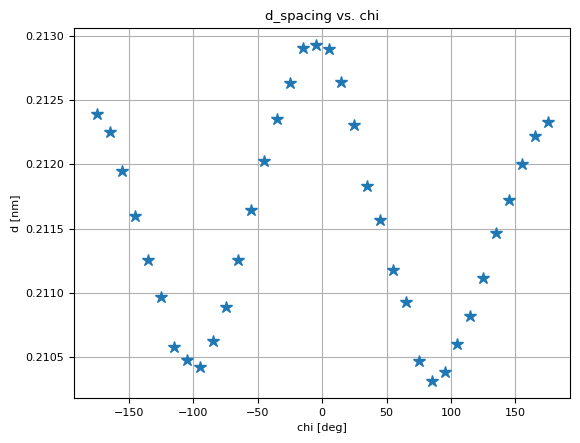

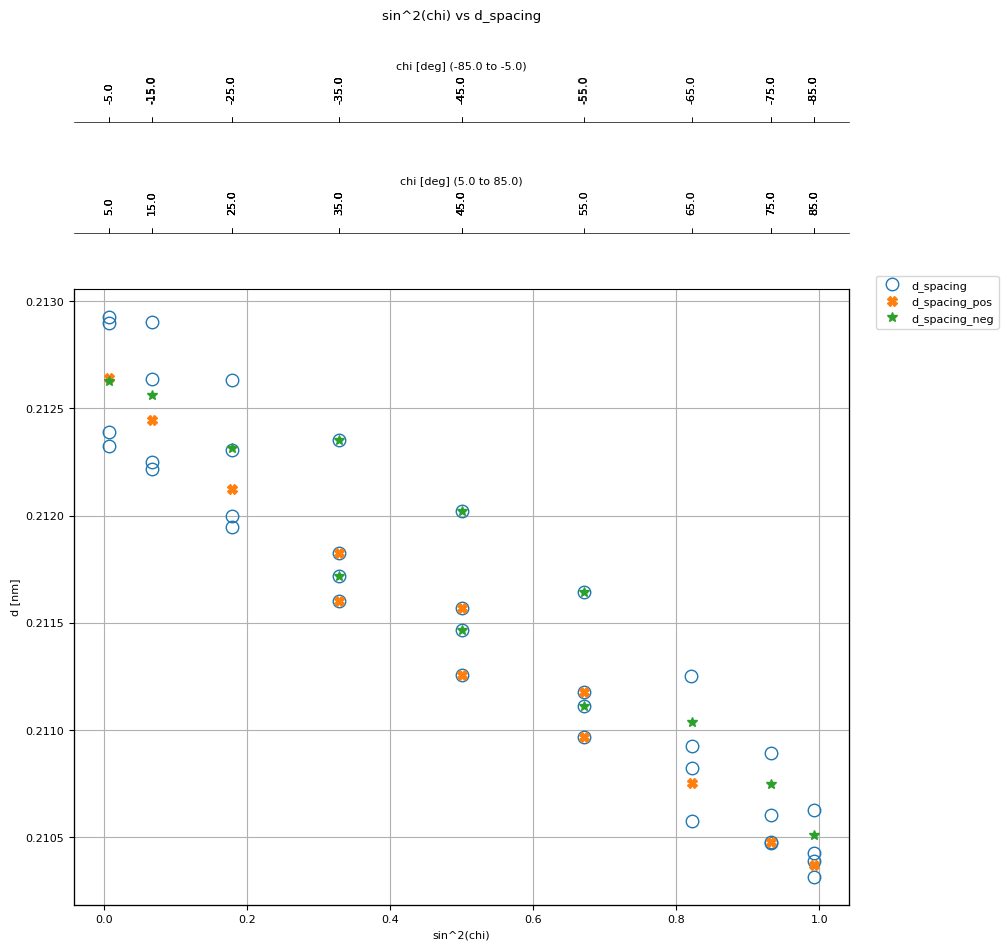

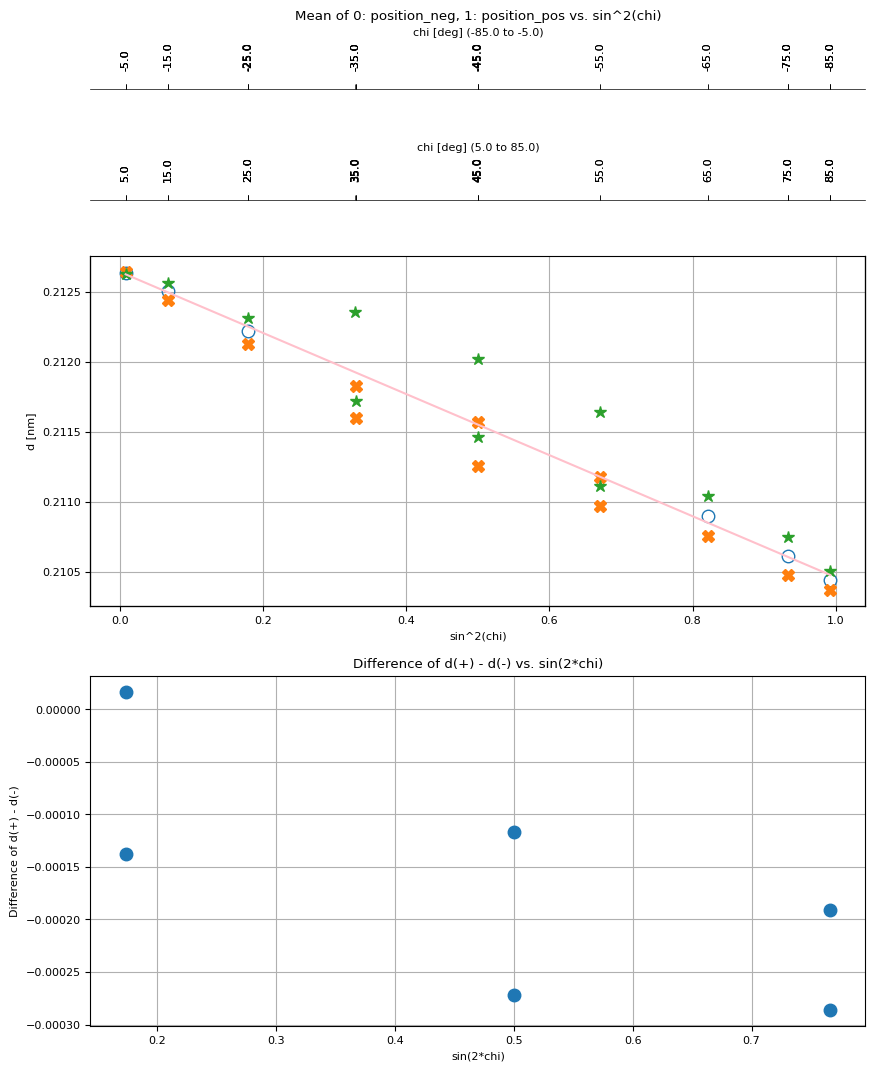

In [3]:
def chi_gen(chi_start, chi_stop, delta_chi):
    if chi_start >= chi_stop:
        raise ValueError('chi_start has to be smaller than chi_stop')
    return np.arange(chi_start, chi_stop, delta_chi)


def predefined_metric_calculation(metric_name, chi, x, y, d0, spatial_var, phase_shift):
    """ Calculate predefined metric based on name, applying spatial variation even if x is not provided. """
    # Handle spatial variation by introducing a default or random x if none is provided
    if x is None and spatial_var:
        x = np.random.uniform(0, 1)  #A random x between 0 and 5
    if metric_name == "position":
        return 0.2832*np.sin(np.deg2rad(chi+phase_shift))**2 + d0 + (0.01 * x if spatial_var else 0)
    if metric_name == "area":
        return np.random.uniform(6, 37, size=len(chi)) + 0.1 * y
    if metric_name == "FWHM":
        return np.random.uniform(0.35, 0.75, size=len(chi))
    if metric_name == "background at peak":
        return np.random.uniform(2.3, 5.3, size=len(chi))
    if metric_name == "total count intensity":
        return np.random.uniform(80, 800, size=len(chi))
    return np.random.uniform(1.5708, 3.141, size=len(chi))  # Fallback for unknown metrics

def plot_sin2chi(chi):
    fig, ax = plt.subplots()
    ax.plot(np.sin(np.deg2rad(chi))**2, linestyle='None', marker='o')
    ax.set_xlabel('chi [deg]')
    ax.set_ylabel('sin^2(chi)')
    ax.set_title('sin^2(chi) vs chi')
    ax.grid()
    fig.show()

def generate_spatial_fit_res(y_range, x_range=None, chi_start=-175, chi_stop=180, delta_chi=10, fit_labels=None, spatial_var=True, phase_shift=0):
    '''
    chi [degree]
    phase_shift [degree]
    '''
    
    if fit_labels is None:
        fit_labels = '0: position; 1: area; 2: FWHM; 3: background at peak; 4: total count intensity'
    fit_labels_dict = {int(k.split(':')[0].strip()): k.split(':')[1].strip() for k in fit_labels.replace(', ', ';').split(';')}

    chi = chi_gen(chi_start, chi_stop, delta_chi)
    d0 = 25  # in nm

    # Determine the dimensions based on x_range
    if x_range is not None:
        result_array = np.empty((len(y_range), len(x_range), len(chi), len(fit_labels_dict)))
    else:
        result_array = np.empty((len(y_range), len(chi), len(fit_labels_dict)))
        x_range = [None]  # Simulate the absence of x values

    # Perform calculations for each y and x, and across all metrics
    for j, y in enumerate(y_range):
        for i, x in enumerate(x_range):
            fit_results = []
            for idx in sorted(fit_labels_dict.keys()):
                metric_name = fit_labels_dict[idx]
                result = predefined_metric_calculation(metric_name, chi, x, y, d0, spatial_var, phase_shift)
                fit_results.append(result)

            fit_results = np.array(fit_results)
            # Adjust how results are stored based on the presence of x_range
            # Debug print statements
            #print(f"fit_results.T.shape: {fit_results.T.shape}, j: {j}, i: {i}")
            #print('x_range:', x_range)
            if x is not None:
                result_array[j, i, :, :] = fit_results.T
            else:
                result_array[j, :, :] = fit_results.T  # Ensure dimensionality matches expected (len(chi), len(fit_labels_dict))

    return result_array

def adding_noise_d_spacing(d_spacing, scale=0.03, mean_value=1, seed=10):
    '''
    ds: Dataset, expecting in first column d-spacing values.
    Noise follows a Laplace distribution
    mean_value, scale: Mean_value and scale parameter of Laplace distribution
    Seed: random seed
    
    '''
    ds = d_spacing.copy()
    #Introducing seed and random noise for d_spacing
    # Define the scale parameter for the Laplace distribution
    # Generate Laplace noise centered around the mean value
    d_spacing_noise = np.random.default_rng(seed=seed).laplace(mean_value, scale, size=d_spacing.array.shape[0])
 
    d_spacing_with_noise = d_spacing.array[:,0] + d_spacing_noise
    #update array in ds
    ds.array[:,0] = d_spacing_with_noise
    return ds
  


def plot_d_spacing_vs_chi_1d(ds, chi, scan_axis):
    
    print('ds.shape:', ds.shape)
    
    chi_key, (pos_key, pos_idx)  = chi_pos_verification(ds)
    
    fig, ax = plt.subplots()
    
    for pos in ds.axis_ranges[scan_axis]:
        # Extract d_spacing for the specific position
        d_spacing = ds[pos, :, ]
   

def plot_d_spacing_vs_chi_2d(ds, chi, positions):
    """
    Plots d_spacing vs chi for specified (x, y) positions in the result array using Matplotlib's OOP interface.

    Parameters:
        ds (Dataset): The 4D array containing measurement data.
        chi (numpy.ndarray): The array of chi values.
        positions (list of tuples): A list of (x_index, y_index) tuples specifying the positions to plot.
    """

    print('ds.shape:', ds.shape)
    
    fig, ax = plt.subplots()
    for (x_index, y_index) in positions:
        # Extract d_spacing for the specific position
        d_spacing = ds.array[x_index, y_index, :, 0]  # d_spacing is the first property in the last dimension
        
        # Plotting using the axes object
        ax.plot(chi, d_spacing, label=f'(x={x_index}, y={y_index})', marker='o', linestyle='--')
    
    ax.set_xlabel('chi [deg]')
    ax.set_ylabel('d_spacing')
    ax.set_title('d_spacing vs chi for various x,y')
    ax.grid(True)
    
    ax.legend()
    plt.show()
    
def plot_pre_regression_calculation_res(d_spacing_combined, d_spacing_avg, d_spacing_diff, chi):
    
    mask = ~np.isnan(d_spacing_avg.array)
    x_data_filtered = d_spacing_avg.axis_ranges[0][mask]
    y_data_filtered = d_spacing_avg.array[mask]
    
    popt_reg_fit, pcov_reg_fit = curve_fit(regression_line_fit, x_data_filtered, y_data_filtered, maxfev=100000, sigma=0.001*np.ones(y_data_filtered.shape), absolute_sigma=False)    
    m_fit=popt_reg_fit[0]
    offset_fit=popt_reg_fit[1]
       
    
    
    import matplotlib.gridspec as gridspec
    # Create a GridSpec with explicit height ratios
    fig = plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 1], hspace=0.2)  # Increase hspace for more vertical space

    # Create the subplots using ax[0] and ax[1]
    ax = [None, None]
    ax[0] = fig.add_subplot(gs[0])
    ax[1] = fig.add_subplot(gs[1])
    
    ax[0].plot(d_spacing_avg.axis_ranges[0],  d_spacing_avg.array, linestyle='None', marker='o', label=f'{d_spacing_avg.data_label}', markerfacecolor='None', markersize=9)
    ax[0].plot(d_spacing_combined.axis_ranges[1], d_spacing_combined.array[1,:], linestyle='None', marker='X', label='d_spacing_pos', markersize=8)
    ax[0].plot(d_spacing_combined.axis_ranges[1],  d_spacing_combined.array[0,:], linestyle='None', marker='*', label='d_spacing_neg', markersize=9)
    ax[0].plot(d_spacing_avg.axis_ranges[0], sim_regression_line(d_spacing_avg.axis_ranges[0], m_fit, offset_fit), color='pink', label=f'fit: m={m_fit:.3f}, offset={offset_fit:.5f}')
    ax[0].set_ylabel(f'd [{d_spacing_avg.data_unit}]')
    ax[0].set_xlabel(d_spacing_avg.axis_labels[0])
    ax[0].set_title(f'{d_spacing_avg.data_label} vs. {d_spacing_avg.axis_labels[0]}') #'sin^2(chi) vs d_spacing
    #interval = 4
    #x_index = np.arange(0, len(chi), interval)
    #ax2top=ax[0].twiny()
    #ax2top.set_xlim(ax[0].get_xlim())
    #formatted_labels = [f'{val:.2f}' for val in chi[x_index]]
    #ax2top.set_xticks(x_index)
    #ax2top.set_xticklabels(formatted_labels)
    #ax2top.set_xlabel('chi [deg]')
    #ax[0].legend(loc='upper right', bbox_to_anchor=(1.51, 1.02))
    
    add_chi_axes(ax[0], chi, fig)
    
    ax[0].grid()
    
    ax[1].plot(d_spacing_diff.axis_ranges[0], d_spacing_diff.array, linestyle='None', marker='o', label=d_spacing_diff.data_label, markersize=9)
    ax[1].set_title(f'{d_spacing_diff.data_label} vs. {d_spacing_diff.axis_labels[0]}')
    ax[1].set_xlabel(f'{d_spacing_diff.axis_labels[0]}')
    ax[1].set_ylabel(f'{d_spacing_diff.data_label}')
    ax[1].grid()
    # Adjust the space between the subplots
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical space    
    fig.show() 
   
def split_fit_labels(input_string):

    # Split the string into key:value pairs
    pairs = input_string.split(';')

    # Initialize an empty dictionary to hold the key:value pairs
    result_dict = {}

    # Loop through each pair, split it into key and value, and add them to the dictionary
    for pair in pairs:
        # Strip any extra whitespace
        pair = pair.strip()
        # Split the pair into key and value
        if pair:
            key, value = pair.split(': ')
            # Add the key:value to the dictionary
            result_dict[int(key)] = value


    return result_dict



    
def create_dummy_dataset(delta_chi, chi_start, chi_stop, phase_shift, spatial_var=False):
       
    chi=chi_gen(chi_start, chi_stop, delta_chi)
    print('Chi\n', chi)
    
    plot_sin2chi(chi)
   
    #x, y in um
    y = np.arange(2, 8)
    x = np.arange(0, 5)

    #labels
    fit_labels= '0: position; 1: area; 2: FWHM; 3: background at peak; 4: total count intensity'
    fit_labels_dict = {int(item.split(":")[0].strip()): item.split(":")[1].strip() for item in fit_labels.split(";")}
    num_labels = len(fit_labels_dict)
    
    #make up data label 
    data_labels= 'position / nm; area / (cts * nm); FWHM / nm;background at peak / cts; total count intensity / cts'
    
    
    #creation of Pydidas Dataset
    axis_labels= ['y', 'x', 'chi', fit_labels]
    axis_ranges = {0: y, 1:x, 2: chi , 3: np.arange(num_labels)} 
    axis_units= ['um', 'um', 'deg', '']    
   
    result_array= generate_spatial_fit_res(y, x, chi_start,chi_stop, delta_chi, fit_labels , spatial_var=spatial_var, phase_shift=phase_shift)
    
    print('Result array shape\n', result_array.shape)
    ds = Dataset(result_array,  axis_labels=axis_labels, axis_units=axis_units,axis_ranges=axis_ranges, data_label=data_labels)
         
    return (chi, ds)
    
    
@dataclass
class Real_Dataset_Info:
    path: Path
    fname: str
    
    def fpath(self) -> Path:
        return self.path / Path(self.fname)
  
    
def create_real_dataset_from_Davids_data(real_dataset_info: Real_Dataset_Info):
    
    path_to_wavelength = 'entry/pydidas_config/diffraction_exp/xray_wavelength'
    path_to_energy = 'entry/pydidas_config/diffraction_exp/xray_energy'
    
    with h5.File(real_dataset_info.fpath(), 'r') as f:
        wavelength = f[path_to_wavelength][()] #keV
        energy = f[path_to_energy][()] #Angstrom
    print('Wavelegth [A]\n', wavelength)
    print('Energy [keV]\n', energy)
        
    
    fpath=real_dataset_info.fpath()
    ds= import_data(fpath)
    
    #print(40*"\N{microbe}")
    #print(ds)
    #print(40*"\N{microbe}")
      
    #reverse_axis_labels={value: key for key, value in ds.axis_labels.items()}
    #if 'chi' in reverse_axis_labels:
    #    chi = ds.axis_ranges[reverse_axis_labels['chi']]
    #lse:
    #    raise ValueError('chi not found in axis_labels')
   
    chi_key, (pos_key, pos_idx) = chi_pos_verification(ds)
    chi=ds.axis_ranges[chi_key] 
     
    position = ds.array[:,:,pos_idx]
       
    #in this dataset 'position' is given in 2theta, not d_spacing
    #energy = 112.67000000010138 #keV
    wavelength_calculated = 12.39841662513396/energy #result in Angstrom, energy [keV]
    print('Wavelength calculated [A]', wavelength_calculated)
    if np.allclose(wavelength, wavelength_calculated):
        d_spacing = wavelength/(2*np.sin(np.deg2rad(position)/2))
        print('d_spacing.shape\n', d_spacing.shape)
    else: 
        raise ValueError('Wavelength in file does not match calculated wavelength')
       
    ds_new = ds.copy()
    ds_new[:,:,pos_idx] = d_spacing
    
    new_data_label =  'position / A; amplitude / cts; area / (cts *A); FWHM / A; background at peak / cts; total count intensity / cts' 
    ds_new.data_label = new_data_label

   
    return (chi, ds_new)
  
def sin2_fit(chi, a, b,c ):
    return a*np.sin(np.deg2rad(chi)+b)**2+c  

def sim_sin2(chi, a, b,c):
    return a*np.sin(np.deg2rad(chi)+b)**2+c

def regression_line_fit(s2c, m, offset):
    return m*s2c + offset

def sim_regression_line(s2c, m, offset):
    return m*s2c + offset



def add_chi_axes(ax, chi, fig):
    """
    Add two top x-axes to the given axes: one for positive chi and one for negative chi.
    Dynamically adjust the number of labels based on the figure width and avoid label overlap.
    
    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the top x-axes will be added.
        chi (np.ndarray): The chi values in degrees.
        fig (matplotlib.figure.Figure): The figure containing the axes.
    """
    
    # Calculate sin^2(chi)
    sin2_chi = np.sin(np.deg2rad(chi))**2
    
    # Calculate the number of labels to display based on figure width
    fig_width = fig.get_size_inches()[0]  # Width of the figure in inches
    num_labels = max(5, int(fig_width * 3))  # Adjust this factor as needed

    # Create top x-axis for chi_positive
    ax2top_pos = ax.twiny()
    ax2top_pos.set_xlim(ax.get_xlim())
    
    # Position the second top x-axis slightly outward
    ax2top_pos.spines['top'].set_position(('outward', 40))  # Adjust this value for proper spacing
    ax2top_pos.spines['top'].set_linewidth(0.5)  # Adjust line width if needed

    # Calculate the corresponding chi values from sin^2(chi)
    chi_positive = np.rad2deg(np.arcsin(np.sqrt(sin2_chi)))

    # Select a subset of chi values to display
    indices = np.linspace(0, len(chi_positive) - 1, num_labels, dtype=int)

    # Ensure the tick positions are within the x-axis limits
    ticks_pos = np.clip(sin2_chi[indices], ax.get_xlim()[0], ax.get_xlim()[1])
    labels_pos = [f'{val:.1f}' for val in chi_positive[indices]]
    
    # Set the ticks and labels for chi_positive
    ax2top_pos.set_xticks(ticks_pos)
    ax2top_pos.set_xticklabels(labels_pos)

    # Dynamic label for chi_positive
    chi_pos_min = np.min(chi_positive)
    chi_pos_max = np.max(chi_positive)
    ax2top_pos.set_xlabel(f'chi [deg] ({chi_pos_min:.1f} to {chi_pos_max:.1f})')

    # Create another top x-axis for chi_negative
    ax2top_neg = ax.twiny()
    ax2top_neg.set_xlim(ax.get_xlim())
    
    # Move the second top axis further outward
    ax2top_neg.spines['top'].set_position(('outward', 120))  # Further outward than ax2top_pos
    ax2top_neg.spines['top'].set_linewidth(0.5)  # Adjust line width if needed

    # Calculate the corresponding negative chi values (-180 to -90)
    chi_negative = np.rad2deg(np.arcsin(-np.sqrt(sin2_chi)))

    # Select a subset of negative chi values to display
    indices_neg = np.linspace(0, len(chi_negative) - 1, num_labels, dtype=int)

    # Ensure the tick positions are within the x-axis limits
    ticks_neg = np.clip(sin2_chi[indices_neg], ax.get_xlim()[0], ax.get_xlim()[1])
    labels_neg = [f'{val:.1f}' for val in chi_negative[indices_neg]]
    
    # Set the ticks and labels for chi_negative
    ax2top_neg.set_xticks(ticks_neg)
    ax2top_neg.set_xticklabels(labels_neg)

    # Dynamic label for chi_negative
    chi_neg_min = np.min(chi_negative)
    chi_neg_max = np.max(chi_negative)
    ax2top_neg.set_xlabel(f'chi [deg] ({chi_neg_min:.1f} to {chi_neg_max:.1f})')

    # Adjust label rotation and alignment to prevent overlap
    for label in ax2top_pos.get_xticklabels():
        label.set_rotation(90)  # Rotate labels for readability
        label.set_horizontalalignment('center')  # Center-align labels
        label.set_verticalalignment('bottom')  # Bottom-align labels

    for label in ax2top_neg.get_xticklabels():
        label.set_rotation(90)  # Rotate labels for readability
        label.set_horizontalalignment('center')  # Center-align labels
        label.set_verticalalignment('bottom')  # Bottom-align labels

    # Adjust spacing between labels and axis
    ax2top_pos.xaxis.set_tick_params(width=0.5, pad=10)  # Increase padding
    ax2top_neg.xaxis.set_tick_params(width=0.5, pad=10)  # Increase padding
    
def main3():
    real_dataset_info1= Real_Dataset_Info(path=Path('/Users/gudrun/Hereon_pydidas/pydidas_training/TiN_peak_1_2_with_units'), fname='node_04_peak_1.h5')
    ds = import_data(real_dataset_info1.fpath())
    
    x_idx=9
    y_idx=9
    
    print(40*"\N{popcorn}")
    print(ds)
    print(40*"\N{popcorn}")
    axis_labels = ds.axis_labels
    print('Axis labels\n', axis_labels)
    print('Shape of dataset\n', ds.shape)
    print('Type ds\n', type(ds))
    print('Data label: ', ds.data_label)
    print(40*"\N{popcorn}")
    
    # slice Dataset based on location
    ds1 = ds[x_idx, y_idx]
    
    chi, d_spacing = ds_slicing(ds1)
    
    print('chi', chi)
    print('d_spacing', d_spacing.array)
    
    fig, ax = plt.subplots()
    ax.plot(chi, ds1.array[:,0], linestyle='None', marker='*', label='d_spacing', markersize=9)
    ax.grid()
    ax.set_ylabel('d [nm]')
    ax.set_xlabel('chi [deg]')
    ax.set_title('d_spacing vs. chi')
    fig.show()
          
    chi_key, (pos_key, pos_idx) = chi_pos_verification(ds1)
    print('chi_key, pos_key, pos_idx:')
    print(chi_key, pos_key, pos_idx)

    chi, d_spacing = ds_slicing(ds1)    
    
    print(40*"\N{microbe}")
    print(d_spacing)
    print(40*"\N{microbe}")
    
    d_spacing_pos, d_spacing_neg=group_d_spacing_by_chi(d_spacing, chi)
    
    #print(40*"\N{Cherries}")
    #print('d_spacing_pos\n',d_spacing_pos)
    #print(40*"\N{palm tree}")
    #print('d_spacing_neg\n',d_spacing_neg)
    #print(40*"\N{Cherries}")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(np.sin(np.deg2rad(chi))**2, d_spacing, linestyle='None', marker='o', label='d_spacing', markerfacecolor='None', markersize=9)
    ax.plot(d_spacing_pos.axis_ranges[0], d_spacing_pos.array, linestyle='None', marker='X', label='d_spacing_pos', markersize=7)
    ax.plot(d_spacing_neg.axis_ranges[0], d_spacing_neg.array, linestyle='None', marker='*', label='d_spacing_neg', markersize=7)
    ax.set_ylabel('d [nm]')
    ax.set_xlabel('sin^2(chi)')
    ax.set_title('sin^2(chi) vs d_spacing')
    ax.set_title('sin^2(chi) vs d_spacing', pad=30)  # Add padding to the title to move it upwards
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.03))
    add_chi_axes(ax, chi, fig)
    ax.grid()
    fig.show()
    
    
    d_spacing_combined = combine_sort_d_spacing_pos_neg(d_spacing_pos, d_spacing_neg)
    print('d_spacing_combined\n', d_spacing_combined) 
     
    d_spacing_avg, d_spacing_diff = pre_regression_calculation(d_spacing_combined) 
      
        
    #Visualisation of pre regression calculation results
    plot_pre_regression_calculation_res(d_spacing_combined, d_spacing_avg, d_spacing_diff, chi)

    print(30*"\N{strawberry}")
    print('d_spacing shape', d_spacing.shape)
    print('d_spacing_pos shape', d_spacing_pos.shape)
    print('d_spacing_neg shape', d_spacing_neg.shape)
    print('d_spacing_combined shape', d_spacing_combined.shape)
    print('d_spacing_avg shape', d_spacing_avg.shape)
    print('d_spacing_diff shape', d_spacing_diff.shape)
    
    print(40*"\N{High-Heeled Shoe}")
    print('d_spacing_combined shape', d_spacing_combined.shape)
    print('d_spacing_combined\n', d_spacing_combined)
    print(40*"\N{High-Heeled Shoe}")

  
def main2():
      
    #real_dataset_info1= Real_Dataset_Info(path=Path('/Users/gudrun/Hereon_pydidas/pydidas_training/Real_data_David/AM_AB_Line_1_x_z'), fname='node_04.h5')
    real_dataset_info1= Real_Dataset_Info(path=Path('/Users/gudrun/Hereon_pydidas/pydidas_training/Real_data_David/AM_AB_Line_1_y_z'), fname='node_04.h5')

    chi, ds = create_real_dataset_from_Davids_data(real_dataset_info1)
    #which scan position? 
    x_id=12
   
      
    print(40*"\N{popcorn}")
    print(ds.ndim)
    print(ds)
    print(40*"\N{popcorn}")
    axis_labels = ds.axis_labels
    print('Axis labels\n', axis_labels)
    print('Shape of dataset\n', ds.shape)
    print('Dimensions of dataset.array: ', ds.array.ndim)
    print('Type ds\n', type(ds))
    print('Data label: ', ds.data_label)
    print(40*"\N{popcorn}")
    
    chi_key, (pos_key, pos_idx) = chi_pos_verification(ds)
    print('chi_key, pos_key, pos_idx:')
    print(chi_key, pos_key, pos_idx)

    ds1 = ds[x_id]
    chi, d_spacing = ds_slicing(ds1)    
    
    d_spacing_low=np.min(ds[x_id,:,pos_idx])
    popt, pcov = curve_fit(sin2_fit, chi, d_spacing,maxfev=100000, sigma=0.001*np.ones(chi.shape), absolute_sigma=False, bounds=((0, -2, d_spacing_low-0.5),(1, 2, d_spacing_low+0.5)))
    #print(f'a*sin^2(chi+b)+c')
    #print(f'a_fit={popt[0]}, b_fit={popt[1]}, c_fit={popt[2]}')
    a_fit=popt[0]
    b_fit=popt[1]
    c_fit=popt[2]
    
    axis_labels_dict = split_fit_labels(ds.axis_labels[pos_key])
    units=extract_units(ds)
    #print('units', units)
    #print(axis_labels_dict)

    fig, ax = plt.subplots()
    ax.plot(chi, d_spacing, linestyle='None', marker='*', label='d_spacing', markersize=9)
    ax.plot(chi, sim_sin2(chi, a_fit, b_fit, c_fit), color='green', label=f'fit: a*sin^2(chi+b)+c, a={a_fit:.5f}, b={b_fit:.3f}, c={c_fit:.5f}')
    ax.set_ylabel(f'{axis_labels_dict[pos_idx]} [{units[pos_idx][1]}]')
    ax.set_xlabel(f'{ds.axis_labels[chi_key]} [{ds.axis_units[chi_key]}]')    
    ax.set_title(f'{axis_labels_dict[pos_idx]} vs. {ds.axis_labels[chi_key]}')
    ax.grid()
    plt.legend()
    plt.show()
    
    #print(40*"\N{microbe}")
    #print(d_spacing)
    #print(40*"\N{microbe}")
    
        
    d_spacing_pos, d_spacing_neg=group_d_spacing_by_chi(d_spacing, chi)
    
    #print(40*"\N{Cherries}")
    #print('d_spacing_pos\n',d_spacing_pos)
    #print(40*"\N{palm tree}")
    #print('d_spacing_neg\n',d_spacing_neg)
    #print(40*"\N{Cherries}")
    
    fig, ax = plt.subplots()
    ax.plot(np.sin(np.deg2rad(chi))**2, d_spacing, linestyle='None', marker='o', label='d_spacing', markerfacecolor='None', markersize=9)
    ax.plot(d_spacing_pos.axis_ranges[0], d_spacing_pos.array, linestyle='None', marker='X', label='d_spacing_pos', markersize=7)
    ax.plot(d_spacing_neg.axis_ranges[0], d_spacing_neg.array, linestyle='None', marker='*', label='d_spacing_neg', markersize=7)
    ax.set_ylabel(f'{axis_labels_dict[pos_idx]} [{units[pos_idx][1]}]')
    ax.set_xlabel(f'{d_spacing_pos.axis_labels[0]}')
    ax.set_title(f'{d_spacing_pos.axis_labels[0]} vs {axis_labels_dict[pos_idx]}')
    interval = 4
    x_index = np.arange(0, len(chi), interval)
    ax2top=ax.twiny()
    ax2top.set_xlim(ax.get_xlim())
    formatted_labels = [f'{val:.2f}' for val in chi[x_index]]
    ax2top.set_xticks(x_index)
    ax2top.set_xticklabels(formatted_labels)
    ax2top.set_xlabel('chi [deg]')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    ax.grid()
    fig.show()
    
    
    d_spacing_combined = combine_sort_d_spacing_pos_neg(d_spacing_pos, d_spacing_neg)
    #print('d_spacing_combined\n', d_spacing_combined) 
     
    d_spacing_avg, d_spacing_diff = pre_regression_calculation(d_spacing_combined) 
    
     
    #print(40*"\N{aubergine}")
    #print(d_spacing_avg)
    #print(40*"\N{aubergine}")
 
        
    #Visualisation of pre regression calculation results
    plot_pre_regression_calculation_res(d_spacing_combined, d_spacing_avg, d_spacing_diff, chi)   
    
    print(30*"\N{cucumber}")
    print(d_spacing_combined.ndim, d_spacing_diff.ndim, d_spacing_avg.ndim)
 
    print(30*"\N{cucumber}")
        
    print(30*"\N{cucumber}")
    print(d_spacing_avg.shape)
    print(d_spacing_avg)

def main():
    
    #Creating of dummy dataset
    #chi, ds = create_dummy_dataset(delta_chi=10, chi_start=-90, chi_stop=1, phase_shift=70, spatial_var=False)
    chi, ds = create_dummy_dataset(delta_chi=10, chi_start=-180, chi_stop=181, phase_shift=70, spatial_var=False)
    x_idx=3
    y_idx=4
   
    print(40*"\N{popcorn}")
    print(ds)
    print(40*"\N{popcorn}")
    axis_labels = ds.axis_labels
    print('Axis labels\n', axis_labels)
    print('Shape of dataset\n', ds.shape)
    print('Type ds\n', type(ds))
    print('Data label: ', ds.data_label)
    print(40*"\N{popcorn}")
    
    
    #visualisation
    #positions = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]
    #plot_d_spacing_vs_chi_2d(ds, chi, positions)
    #plot_d_spacing_vs_chi_2d(ds_no_spatial, chi, positions)
      
   
    
    #plot_d_spacing_vs_chi_2d(ds, chi, [(x_idx, y_idx)])
    
    
    # slice Dataset based on location
    ds1 = ds[x_idx, y_idx]
    print('Content of ds1 before noise addition\n', ds1.array[:,0])
          
    #Introducing seed and random noise for d_spacing
    ds1 = adding_noise_d_spacing(ds1, scale=0.01, mean_value=1, seed=10)
    #print('Shape of ds1 dataset\n', ds1.shape)
    #print('Content ds1 array after noise addition\n',  ds1.array[:,0])
    #print(ds1)
    
    
    #Introducing np.nan 
    #print('Content ds1 array',  ds1.array[:,0])
    #ds1.array[0:9:2,0] = np.nan
    #ds1.array[18:28:2,0] = np.nan
   
    fig, ax = plt.subplots()
    ax.plot(chi, ds1.array[:,0], linestyle='None', marker='*', label='d_spacing', markersize=9)
    ax.grid()
    ax.set_ylabel('d [nm]')
    ax.set_xlabel('chi [deg]')
    ax.set_title('d_spacing vs. chi')
    fig.show()
          
    chi_key, (pos_key, pos_idx) = chi_pos_verification(ds1)
    print('chi_key, pos_key, pos_idx:')
    print(chi_key, pos_key, pos_idx)

    chi, d_spacing = ds_slicing(ds1)    
    
    print(40*"\N{microbe}")
    print(d_spacing)
    print(40*"\N{microbe}")
    
        
    d_spacing_pos, d_spacing_neg=group_d_spacing_by_chi(d_spacing, chi)
    
    #print(40*"\N{Cherries}")
    #print('d_spacing_pos\n',d_spacing_pos)
    #print(40*"\N{palm tree}")
    #print('d_spacing_neg\n',d_spacing_neg)
    #print(40*"\N{Cherries}")
    
    fig, ax = plt.subplots()
    ax.plot(np.sin(np.deg2rad(chi))**2, d_spacing, linestyle='None', marker='o', label='d_spacing', markerfacecolor='None', markersize=9)
    ax.plot(d_spacing_pos.axis_ranges[0], d_spacing_pos.array, linestyle='None', marker='X', label='d_spacing_pos', markersize=7)
    ax.plot(d_spacing_neg.axis_ranges[0], d_spacing_neg.array, linestyle='None', marker='*', label='d_spacing_neg', markersize=7)
    ax.set_ylabel('d [nm]')
    ax.set_xlabel('sin^2(chi)')
    ax.set_title('sin^2(chi) vs d_spacing')
    interval = 4
    x_index = np.arange(0, len(chi), interval)
    ax2top=ax.twiny()
    ax2top.set_xlim(ax.get_xlim())
    formatted_labels = [f'{val:.2f}' for val in chi[x_index]]
    ax2top.set_xticks(x_index)
    ax2top.set_xticklabels(formatted_labels)
    ax2top.set_xlabel('chi [deg]')
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    ax.grid()
    fig.show()
    
    
    d_spacing_combined = combine_sort_d_spacing_pos_neg(d_spacing_pos, d_spacing_neg)
    print('d_spacing_combined\n', d_spacing_combined) 
     
    d_spacing_avg, d_spacing_diff = pre_regression_calculation(d_spacing_combined) 
      
        
    #Visualisation of pre regression calculation results
    plot_pre_regression_calculation_res(d_spacing_combined, d_spacing_avg, d_spacing_diff, chi)

    print(30*"\N{strawberry}")
    print('d_spacing shape', d_spacing.shape)
    print('d_spacing_pos shape', d_spacing_pos.shape)
    print('d_spacing_neg shape', d_spacing_neg.shape)
    print('d_spacing_combined shape', d_spacing_combined.shape)
    print('d_spacing_avg shape', d_spacing_avg.shape)
    print('d_spacing_diff shape', d_spacing_diff.shape)

        

if __name__ == "__main__":
    #main2()
    #main()
    main3()